In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
df = pd.read_csv('../data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [8]:
df['parental_level_of_education'].value_counts()   

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df['lunch'].value_counts()  

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [10]:
df['test_preparation_course'].value_counts()    

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [14]:
df.duplicated().sum()


np.int64(0)

In [15]:
numeric_features = [col for col in df.columns if df[col].dtype != 'object']
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

In [16]:
numeric_features

['math_score', 'reading_score', 'writing_score', 'total_score']

In [17]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [19]:
failed_math = df[df['math_score'] < 33 ]
failed_reading = df[df['reading_score'] < 33 ]
failed_writing = df[df['writing_score'] < 33 ]

In [20]:
failed_math

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
17,female,group B,some high school,free/reduced,none,18,32,28,78
59,female,group C,some high school,free/reduced,none,0,17,10,27
76,male,group E,some high school,standard,none,30,26,22,78
91,male,group C,high school,free/reduced,none,27,34,36,97
145,female,group C,some college,free/reduced,none,22,39,33,94
327,male,group A,some college,free/reduced,none,28,23,19,70
338,female,group B,some high school,free/reduced,none,24,38,27,89
363,female,group D,some high school,free/reduced,none,27,34,32,93
466,female,group D,associate's degree,free/reduced,none,26,31,38,95
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,117


In [21]:

def grade(x):
    if x >= 90:
        return 'A'
    elif x >= 80:
        return 'B'
    elif x >= 70:
        return 'C'
    elif x >= 60:
        return 'D'
    elif x >= 33:
        return 'E'
    else:
        return 'F'

In [22]:
df['math_grade'] = df['math_score'].apply(grade)
df['reading_grade'] = df['reading_score'].apply(grade)
df['writing_grade'] = df['writing_score'].apply(grade)

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_grade,reading_grade,writing_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,278,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,E,E,E
4,male,group C,some college,standard,none,76,78,75,229,C,C,C


In [24]:
df['math_grade'].value_counts()

math_grade
E    304
D    268
C    216
B    135
A     58
F     19
Name: count, dtype: int64

In [25]:
df['reading_grade'].value_counts()  

reading_grade
C    264
E    243
D    233
B    170
A     79
F     11
Name: count, dtype: int64

In [26]:
df['writing_grade'].value_counts()

writing_grade
E    269
C    254
D    230
B    157
A     78
F     12
Name: count, dtype: int64

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_grade,reading_grade,writing_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,278,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,E,E,E
4,male,group C,some college,standard,none,76,78,75,229,C,C,C


In [28]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

<Axes: title={'center': 'Distribution of Math Scores'}, xlabel='Math Score', ylabel='Frequency'>

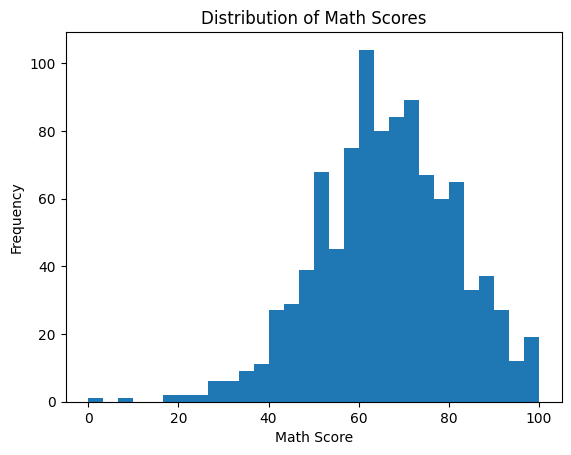

In [29]:
df['math_score'].plot(kind='hist', bins=30, xlabel='Math Score', title='Distribution of Math Scores', ylabel='Frequency')

<Axes: title={'center': 'Parental Level of Education Distribution'}, xlabel='counts', ylabel='Parental Level of Education'>

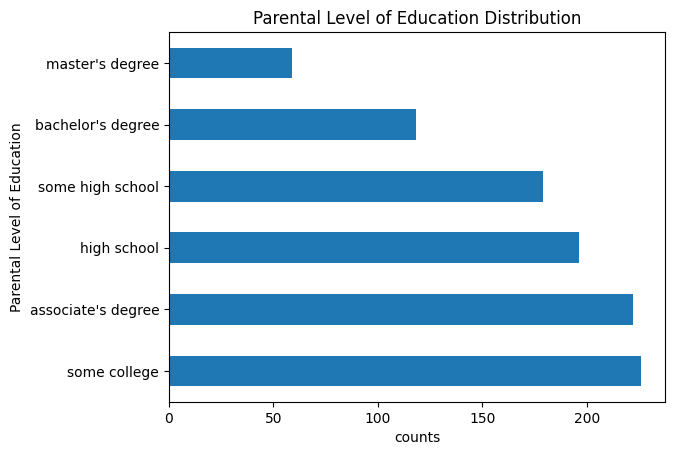

In [30]:
df['parental_level_of_education'].value_counts().plot(kind='barh',xlabel='counts',ylabel='Parental Level of Education', title='Parental Level of Education Distribution')

<Axes: title={'center': 'Parental Level of Education Distribution'}, ylabel='count'>

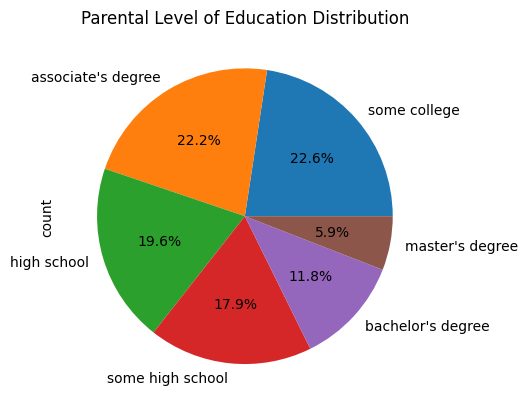

In [31]:
df['parental_level_of_education'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Parental Level of Education Distribution')

<Axes: xlabel='math_score', ylabel='Count'>

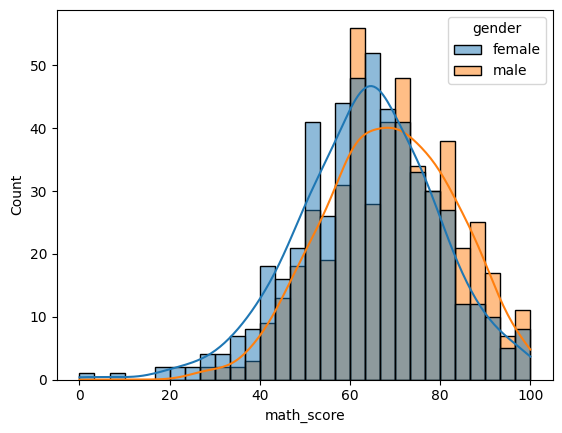

In [32]:
sns.histplot(data=df,x='math_score',hue='gender',bins=30,kde=True)

<Axes: xlabel='math_score', ylabel='race_ethnicity'>

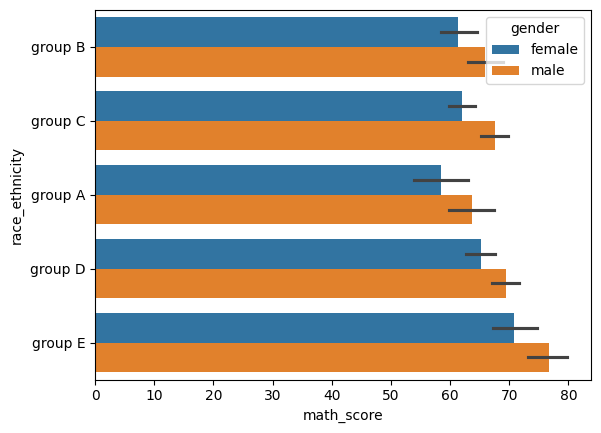

In [33]:
sns.barplot(data=df,x='math_score',y='race_ethnicity',hue='gender')

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_grade,reading_grade,writing_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,278,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,E,E,E
4,male,group C,some college,standard,none,76,78,75,229,C,C,C


Text(0.5, 1.0, 'Distribution of Math Scores')

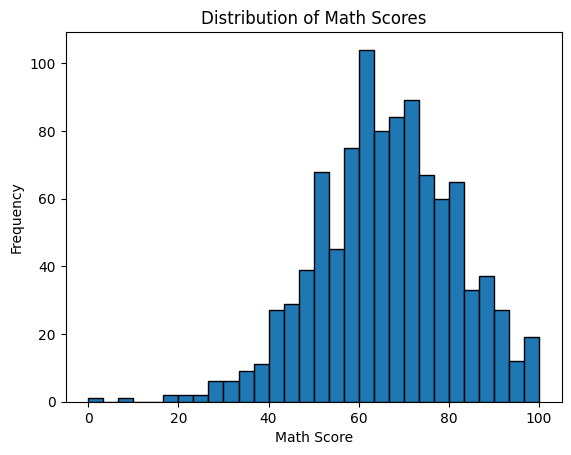

In [58]:
plt.hist(df['math_score'], bins=30, edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')

In [72]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x11d626710>,
 [Text(0.5923243462640188, 0.9269044550669194, 'group B'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group C'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group A'),
  Text(0.5952332509117034, -0.9250391218803047, 'group D'),
  Text(1.0572819245745813, -0.30357030811307883, 'group E')],
 [Text(0.32308600705310114, 0.5055842482183196, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

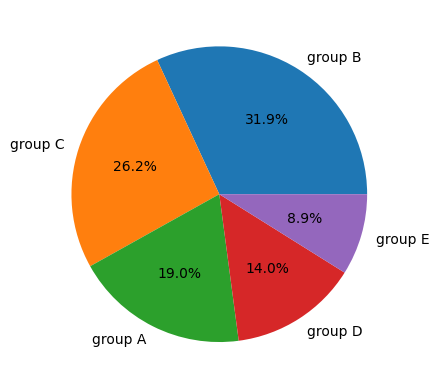

In [73]:
plt.pie(df['race_ethnicity'].value_counts(),autopct='%1.1f%%',labels=df['race_ethnicity'].unique())